<a href="https://colab.research.google.com/github/MuhamedAdemi/Brainster-Python/blob/main/Code_Workshop_5_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 5 Workshop

## World Happiness dataset
---

## 1. Data Preparation
1. Load datasets (`data_2015.csv` to `data_2019.csv`) and standardize their structure:
   - Retain the following columns:
     - `Overall_rank`, `Country_or_region`, `Score`, `GDP_per_capita`, `Social_support`, `Healthy_life_expectancy`, `Freedom_to_make_life_choices`, `Generosity`, and `Perceptions_of_corruption`.
   - Rename columns to a unified format (e.g., `Country` → `Country_or_region`, `GDP per capita` → `GDP_per_capita`, etc.).
2. Add a new column `Year` to indicate the respective year.

---

## 2. Data Cleaning
1. Concatenate all datasets into a single DataFrame.
2. Handle missing values:
   - Fill missing `Score` values with the median grouped by `Year`.
   - Fill missing values in numeric columns (`GDP_per_capita`, `Social_support`, etc.) with the mean grouped by `Country_or_region`.

---

## 3. Data Analysis
### 1. Trends Over Time
- Group data by `Year` and calculate:
  - Average `Score`, `GDP_per_capita`, and `Healthy_life_expectancy`.
- Create line plots to visualize trends in these metrics over the years.

### 2. Top and Bottom Performers for 2019
- Identify the top 10 happiest and bottom 10 least happy countries for 2019.
- Combine the results into a single horizontal bar chart with contrasting colors.

### 3. Correlation Analysis
- Calculate correlations between `Score` and factors like `GDP_per_capita`, `Social_support`, and `Healthy_life_expectancy`.
- Create a heatmap of the correlation matrix.
- Generate scatter plots for `Score` against key factors to explore relationships.

### 4. Happiness Distribution
- Create a histogram showing the distribution of `Score` values across all years.



In [ ]:
!gdown 1vfFfbf6tzfVVWAKH0-mp9YtcuPNCOdXY

Downloading...
From: https://drive.google.com/uc?id=1vfFfbf6tzfVVWAKH0-mp9YtcuPNCOdXY
To: /content/data_2019.csv
100% 8.63k/8.63k [00:00<00:00, 21.8MB/s]


In [ ]:
!gdown 1htRqpeo_XUue6y1cQ9Fk2g8brHZcqHZC

Downloading...
From: https://drive.google.com/uc?id=1htRqpeo_XUue6y1cQ9Fk2g8brHZcqHZC
To: /content/data_2018.csv
100% 8.63k/8.63k [00:00<00:00, 28.9MB/s]


In [ ]:
!gdown 13S3lqjGNq1zc2y2Tp4tspirolOVMnYTG

Downloading...
From: https://drive.google.com/uc?id=13S3lqjGNq1zc2y2Tp4tspirolOVMnYTG
To: /content/data_2017.csv
100% 28.8k/28.8k [00:00<00:00, 70.6MB/s]


In [ ]:
!gdown 1OSDYFabqS0BnIR6vpVmwgsJs2scw_g3t

Downloading...
From: https://drive.google.com/uc?id=1OSDYFabqS0BnIR6vpVmwgsJs2scw_g3t
To: /content/data_2016.csv
100% 17.2k/17.2k [00:00<00:00, 37.1MB/s]


In [ ]:
!gdown 1O7vDHk78HGCaxVB-lwh8VVqNaS-VXwnj

Downloading...
From: https://drive.google.com/uc?id=1O7vDHk78HGCaxVB-lwh8VVqNaS-VXwnj
To: /content/data_2015.csv
100% 16.6k/16.6k [00:00<00:00, 44.5MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

files = {
    2015: 'data_2015.csv',
    2016: 'data_2016.csv',
    2017: 'data_2017.csv',
    2018: 'data_2018.csv',
    2019: 'data_2019.csv',
}

standard_columns = [
    'Overall_rank', 'Country_or_region', 'Score', 'GDP_per_capita',
    'Social_support', 'Healthy_life_expectancy', 'Freedom_to_make_life_choices',
    'Generosity', 'Perceptions_of_corruption'
]

datasets = {}
for year, file in files.items():
    df = pd.read_csv(file)

    column_mappings = {
        'Country': 'Country_or_region',
        'Happiness Rank': 'Overall_rank',
        'Happiness.Rank': 'Overall_rank',
        'Happiness Score': 'Score',
        'Happiness.Score': 'Score',
        'Economy (GDP per Capita)': 'GDP_per_capita',
        'Family': 'Social_support',
        'Health (Life Expectancy)': 'Healthy_life_expectancy',
        'Freedom': 'Freedom_to_make_life_choices',
        'Trust (Government Corruption)': 'Perceptions_of_corruption',
        'Generosity': 'Generosity',
        'Overall rank': 'Overall_rank',
        'Country or region': 'Country_or_region',
        'Score': 'Score',
        'GDP per capita': 'GDP_per_capita',
        'Social support': 'Social_support',
        'Healthy life expectancy': 'Healthy_life_expectancy',
        'Freedom to make life choices': 'Freedom_to_make_life_choices',
        'Trust..Government.Corruption.': 'Perceptions_of_corruption',
        'Economy..GDP.per.Capita.': 'GDP_per_capita',
        'Health..Life.Expectancy.': 'Healthy_life_expectancy'
    }
    df.rename(columns=column_mappings, inplace=True)
    df = df[[col for col in standard_columns if col in df.columns]]
    df['Year'] = year
    datasets[year] = df

all_data = pd.concat(datasets.values(), ignore_index=True)
all_data.sample(5)

,Overall_rank,Country_or_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Year
0,1.0,Switzerland,7.587,1.396510,1.349510,0.941430,0.665570,0.296780,0.419780,2015
348,34.0,Spain,6.403,1.384398,1.532091,0.888961,0.408781,0.190134,0.070914,2017
429,115.0,Senegal,4.535,0.479309,1.179692,0.409363,0.377922,0.183469,0.115460,2017
766,141.0,Liberia,3.975,0.073000,0.922000,0.443000,0.370000,0.233000,NaN,2019
597,128.0,Georgia,4.340,0.853000,0.592000,0.643000,0.375000,0.038000,NaN,2018


In [ ]:
all_data.isnull().sum()

,0
Overall_rank,75
Country_or_region,0
Score,75
GDP_per_capita,30
Social_support,0
Healthy_life_expectancy,0
Freedom_to_make_life_choices,0
Generosity,0
Perceptions_of_corruption,312
Year,0


In [ ]:
all_data.groupby('Year')['Score'].median()

,Score
Year,
2015,5.194
2016,5.449
2017,5.330
2018,5.358
2019,5.373


In [ ]:
all_data['Score'] = all_data.groupby('Year')['Score'].transform(lambda x: x.fillna(x.median()))

for col in ['GDP_per_capita', 'Social_support', 'Healthy_life_expectancy',
            'Freedom_to_make_life_choices', 'Generosity', 'Perceptions_of_corruption']:
    all_data[col] = all_data.groupby('Country_or_region')[col].transform(lambda x: x.fillna(x.mean()))

all_data.sample(5)

,Overall_rank,Country_or_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Year
314,157.0,Burundi,2.905,0.06831,0.23442,0.15747,0.0432,0.20290,0.094190,2016
24,NaN,Panama,6.786,1.06353,1.19850,0.79661,0.5421,0.24434,0.092700,2015
18,19.0,Belgium,6.937,1.30782,1.28566,0.89667,0.5845,0.22250,0.225400,2015
684,59.0,Honduras,5.373,0.64200,1.23600,0.82800,0.5070,0.24600,0.070218,2019
309,152.0,Rwanda,3.515,0.32846,0.61586,0.31865,0.5432,0.23552,0.505210,2016


In [ ]:
yearly_trends = all_data.groupby('Year').agg(
    Avg_Score=('Score', 'mean'),
    Avg_GDP=('GDP_per_capita', 'mean'),
    Avg_Life_Expectancy=('Healthy_life_expectancy', 'mean')
).reset_index()

yearly_trends

,Year,Avg_Score,Avg_GDP,Avg_Life_Expectancy
0,2015,5.345259,0.846137,0.630259
1,2016,5.403197,0.953880,0.557619
2,2017,5.390523,0.984718,0.551341
3,2018,5.363673,0.895538,0.597346
4,2019,5.383263,0.905562,0.725244


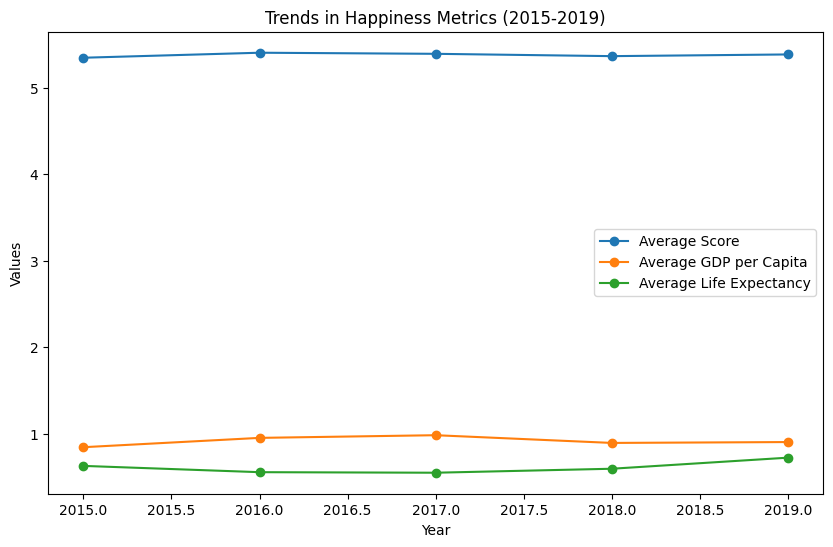

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_trends['Year'], yearly_trends['Avg_Score'], marker='o', label='Average Score')
plt.plot(yearly_trends['Year'], yearly_trends['Avg_GDP'], marker='o', label='Average GDP per Capita')
plt.plot(yearly_trends['Year'], yearly_trends['Avg_Life_Expectancy'], marker='o', label='Average Life Expectancy')
plt.title('Trends in Happiness Metrics (2015-2019)')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.show()

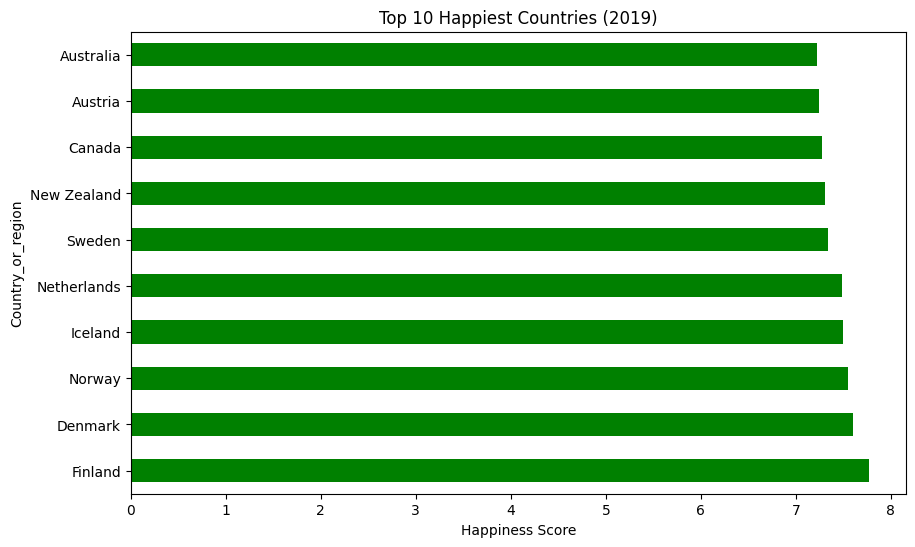

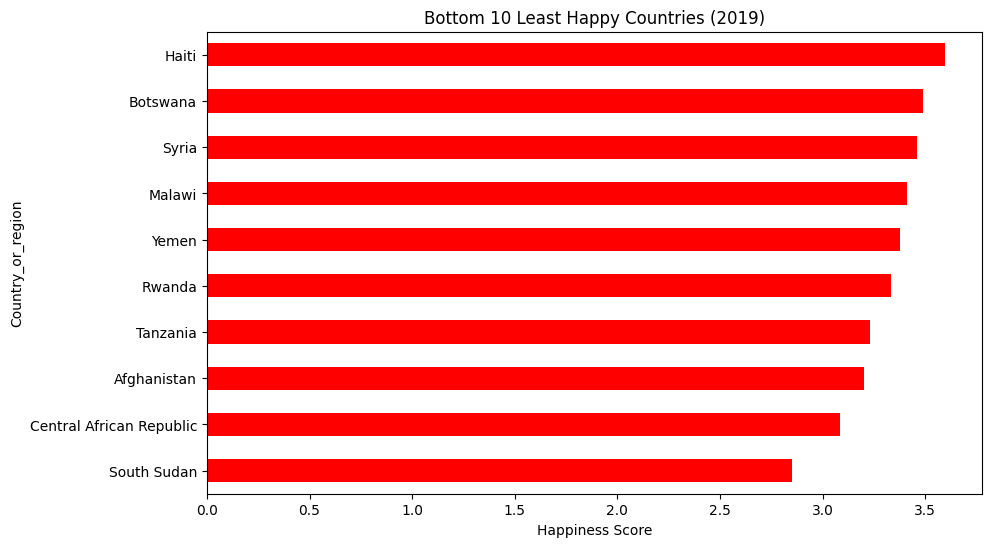

In [ ]:
year = 2019
top_10 = all_data[all_data['Year'] == year].nlargest(10, 'Score')
bottom_10 = all_data[all_data['Year'] == year].nsmallest(10, 'Score')

plt.figure(figsize=(10, 6))
top_10.set_index('Country_or_region')['Score'].plot(kind='barh', color='green', title=f'Top 10 Happiest Countries ({year})')
plt.xlabel('Happiness Score')
plt.show()

plt.figure(figsize=(10, 6))
bottom_10.set_index('Country_or_region')['Score'].plot(kind='barh', color='red', title=f'Bottom 10 Least Happy Countries ({year})')
plt.xlabel('Happiness Score')
plt.show()

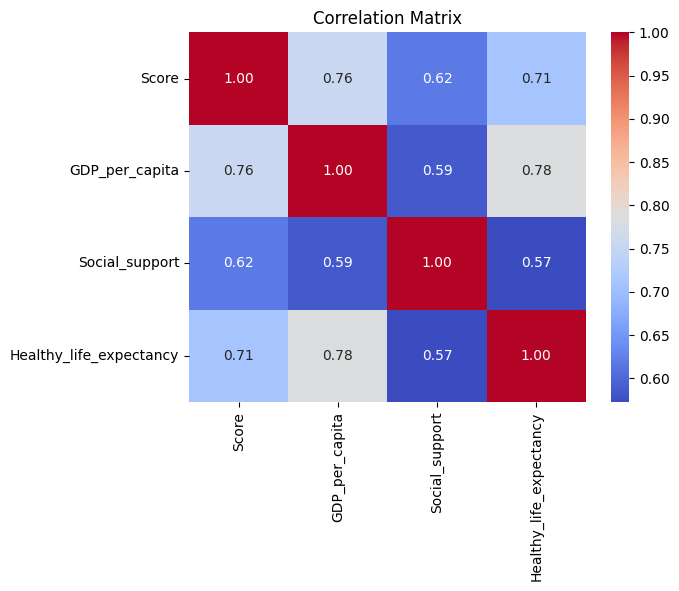

In [ ]:
correlation_matrix = all_data[['Score', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

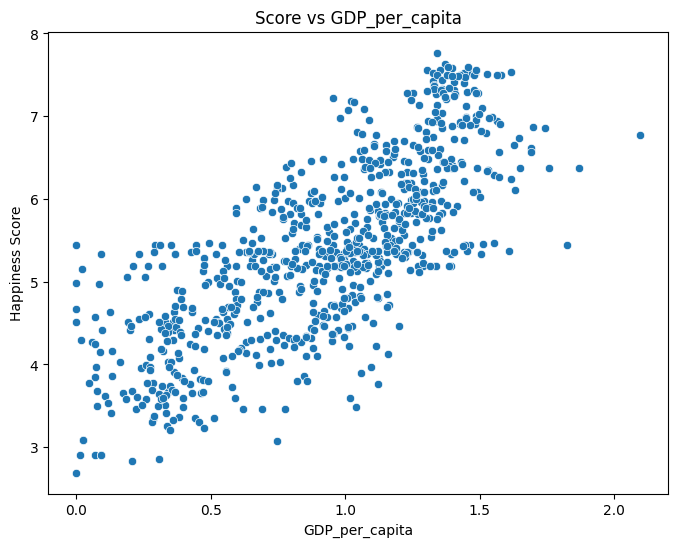

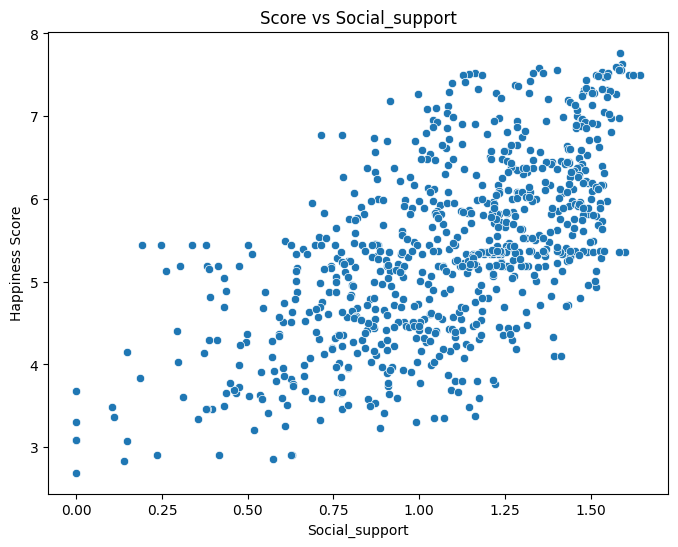

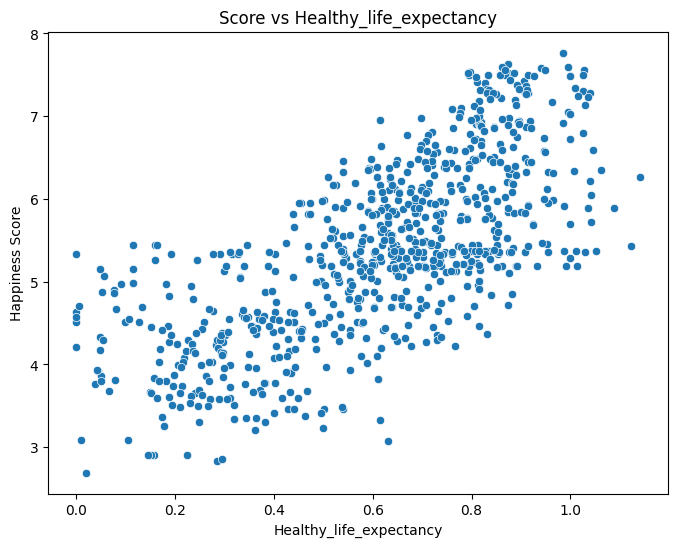

In [ ]:
for col in ['GDP_per_capita', 'Social_support', 'Healthy_life_expectancy']:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=all_data, x=col, y='Score')
    plt.title(f'Score vs {col}')
    plt.xlabel(col)
    plt.ylabel('Happiness Score')
    plt.show()

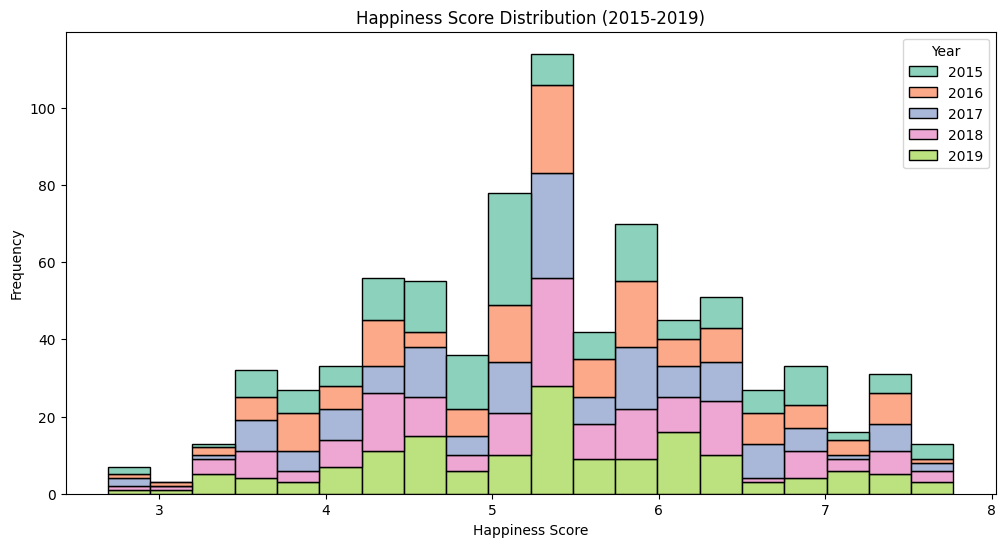

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=all_data, x='Score', hue='Year', multiple='stack', bins=20, palette='Set2')
plt.title('Happiness Score Distribution (2015-2019)')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()